# Clone the git

In [ ]:
!git clone https://github.com/Ikromov247/capstone2023.git

Cloning into 'capstone2023'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 61 (delta 21), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (61/61), 28.07 MiB | 20.17 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


# Paths to the file

In [ ]:
file_path1 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(101지점).xls.xlsx'
file_path2 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(102지점).xls.xlsx'
file_path3 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(103지점).xls.xlsx'
file_path4 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(104지점).xls.xlsx'
file_path5 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(105지점).xls.xlsx'
file_path6 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(106지점).xls.xlsx'
file_path7 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(107지점).xls.xlsx'
file_path8 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(108지점).xls.xlsx'
file_path9 = '/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(109지점).xls.xlsx'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel(file_path1)
df2 = pd.read_excel(file_path2)
df3 = pd.read_excel(file_path3)
df4 = pd.read_excel(file_path4)
df5 = pd.read_excel(file_path5)
df6 = pd.read_excel(file_path6)
df7 = pd.read_excel(file_path7)
df8 = pd.read_excel(file_path8)
df9 = pd.read_excel(file_path9)



# Read the File

In [ ]:
# df8 = pd.read_excel(file_path8, parse_dates= ['시간'])
df9 = pd.read_excel(file_path9, parse_dates= ['시간'])

In [ ]:
#get rid of the last row because it is irrelevant datapoint
# df8.drop(df8.iloc[-1].name, axis=0, inplace=True)
df9 = pd.read_excel(file_path9, parse_dates= ['시간'])
df9.drop(df9.iloc[-1].name, axis=0, inplace=True)
df9['시간'] = pd.to_datetime(df9['시간'])

In [ ]:
# convert the date time column into the appropriate format
# df8['시간'] = pd.to_datetime(df8['시간'])
df9['시간'] = pd.to_datetime(df9['시간'])

# Heat Map

<ipython-input-148-733aed980c3d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df9.corr()


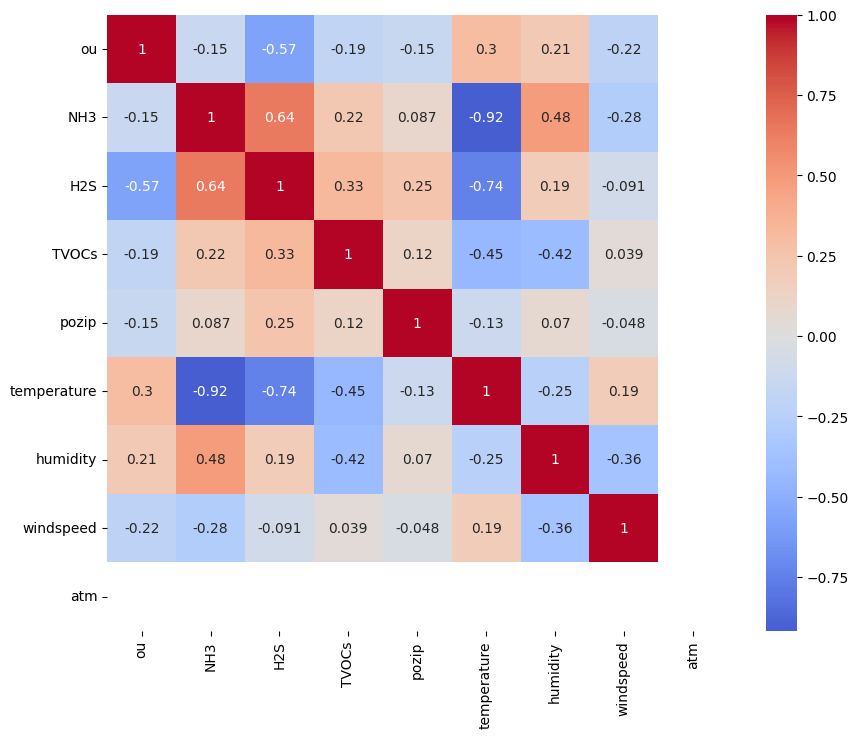

In [ ]:
#heat-map

correlation = df9.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.show()

# Describing the dataset

In [ ]:
df9.describe()

,ou,NH3,H2S,TVOCs,pozip,temperature,humidity,windspeed,atm
count,55893.000000,55893.000000,55893.000000,55893.000000,55893.000000,55893.000000,55893.000000,55893.000000,55893.0
mean,3.658072,0.726118,0.078564,0.073722,0.183476,10.229694,6.405199,0.679777,0.0
std,2.043471,0.130831,0.116482,0.024290,1.118342,11.179700,2.256634,0.814603,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,-16.200000,0.000000,0.000000,0.0
25%,2.300000,0.639000,0.000000,0.070000,0.000000,1.000000,4.800000,0.100000,0.0
50%,3.500000,0.749000,0.002000,0.085000,0.000000,9.900000,6.600000,0.400000,0.0
75%,4.700000,0.822000,0.215000,0.087000,0.000000,19.900000,8.400000,1.000000,0.0
max,45.100000,1.014000,0.369000,0.186000,7.000000,36.200000,10.000000,9.400000,0.0


# Visuzliazing the boxplots of the four main features

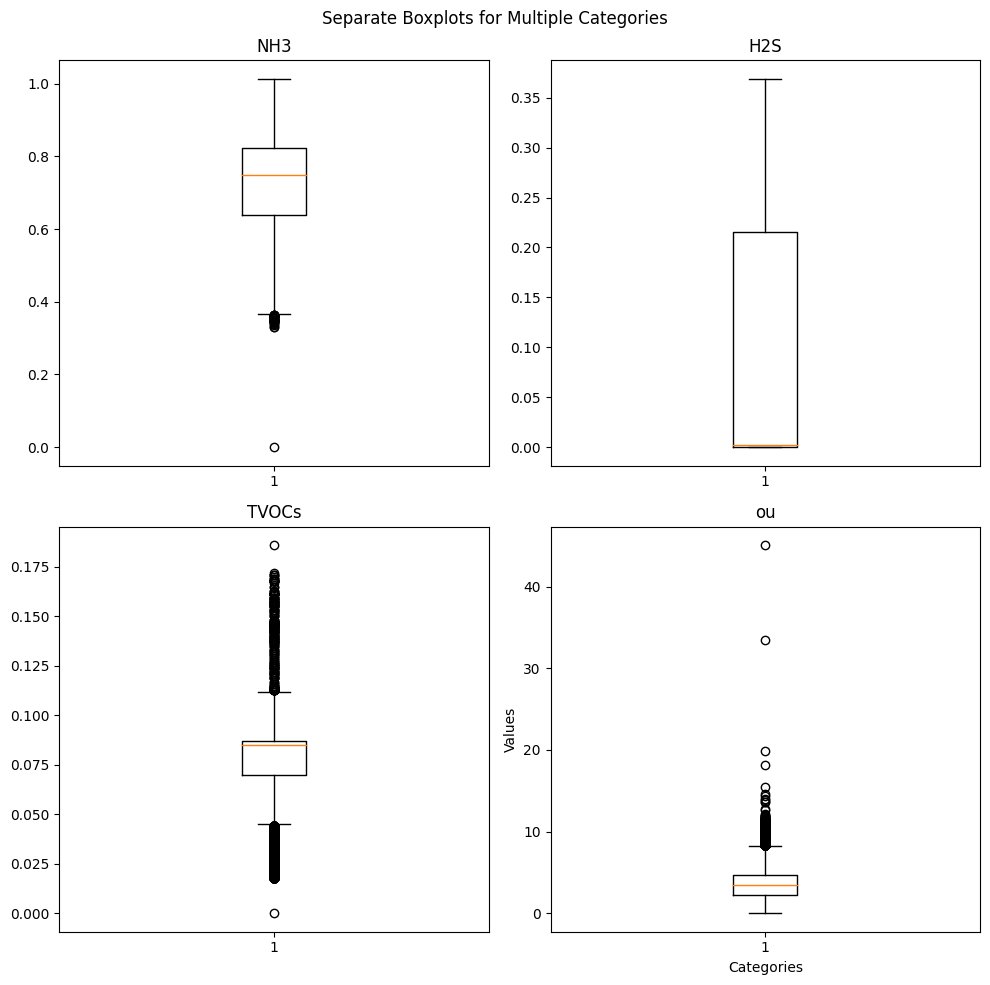

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the first boxplot
axs = axs.ravel()

axs[0].boxplot(df9['NH3'])
axs[0].set_title('NH3')

# Plot the second boxplot
axs[1].boxplot(df9['H2S'])
axs[1].set_title('H2S')

# Plot the third boxplot
axs[2].boxplot(df9['TVOCs'])
axs[2].set_title('TVOCs')

axs[3].boxplot(df9['ou'])
axs[3].set_title('ou')

# Add labels and a title to the entire figure
plt.xlabel("Categories")
plt.ylabel("Values")
plt.suptitle("Separate Boxplots for Multiple Categories")

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()



# Time series graph


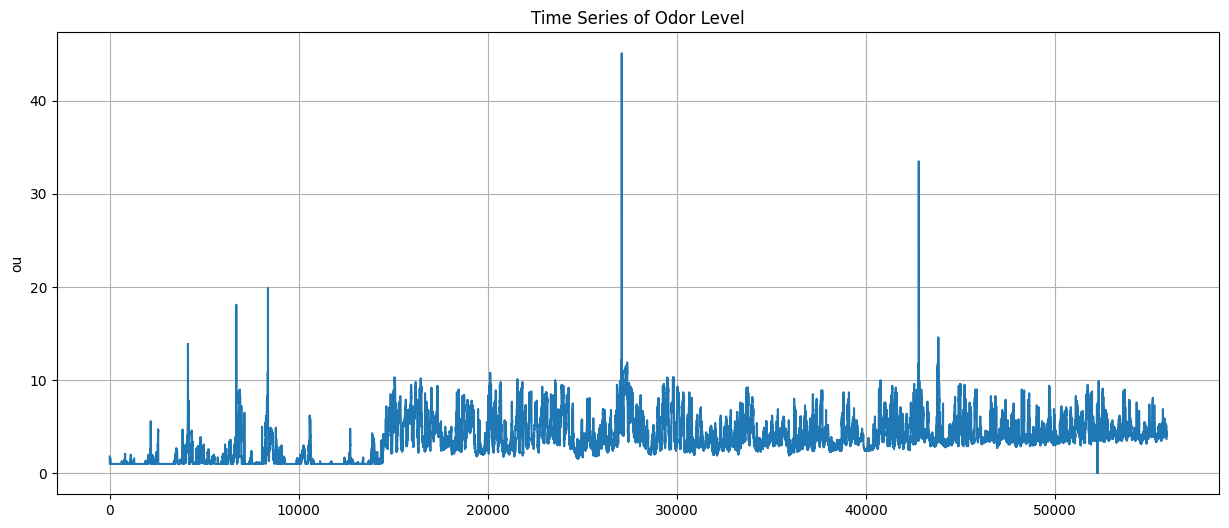

In [ ]:
plt.figure(figsize=(15, 6))
df9['ou'].plot(title='Time Series of Odor Level')
plt.ylabel('ou')
plt.grid(True)
plt.show()

# Time series graph of two or more fearures

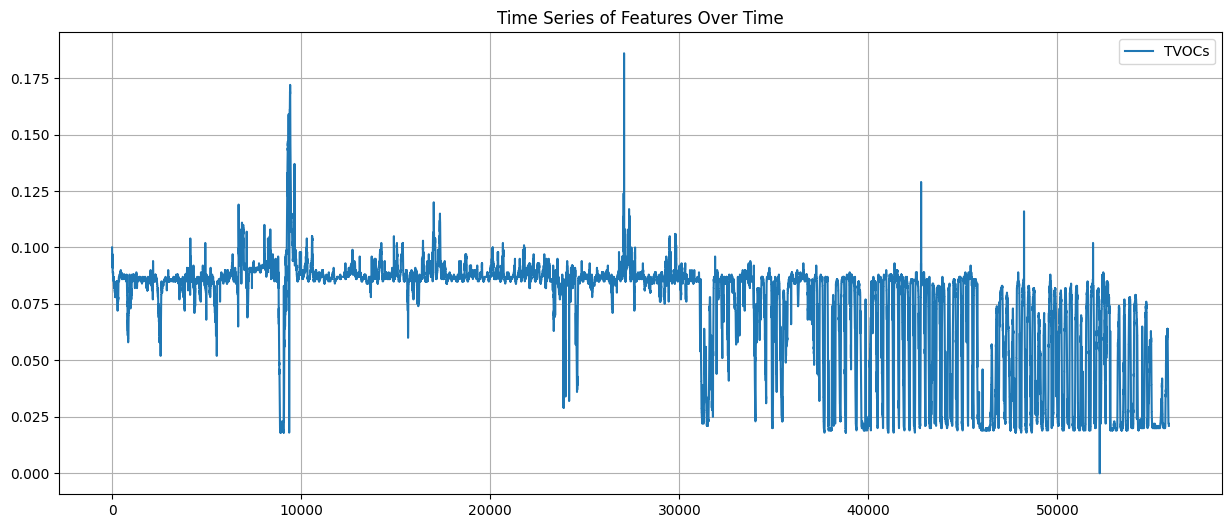

In [ ]:
plt.figure(figsize=(15, 6))
for column in df9.columns:
    if column not in ['시간', 'NH3', 'ou', 'temperature', 'pozip', 'humidity', 'H2S',
       'winddirection', 'windspeed', 'atm']:  # Excluding the target variable or others as needed
        df9[column].plot(label=column)
#df9["ou"].plot(label="ou")
plt.title('Time Series of Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Time Series with different time intervals

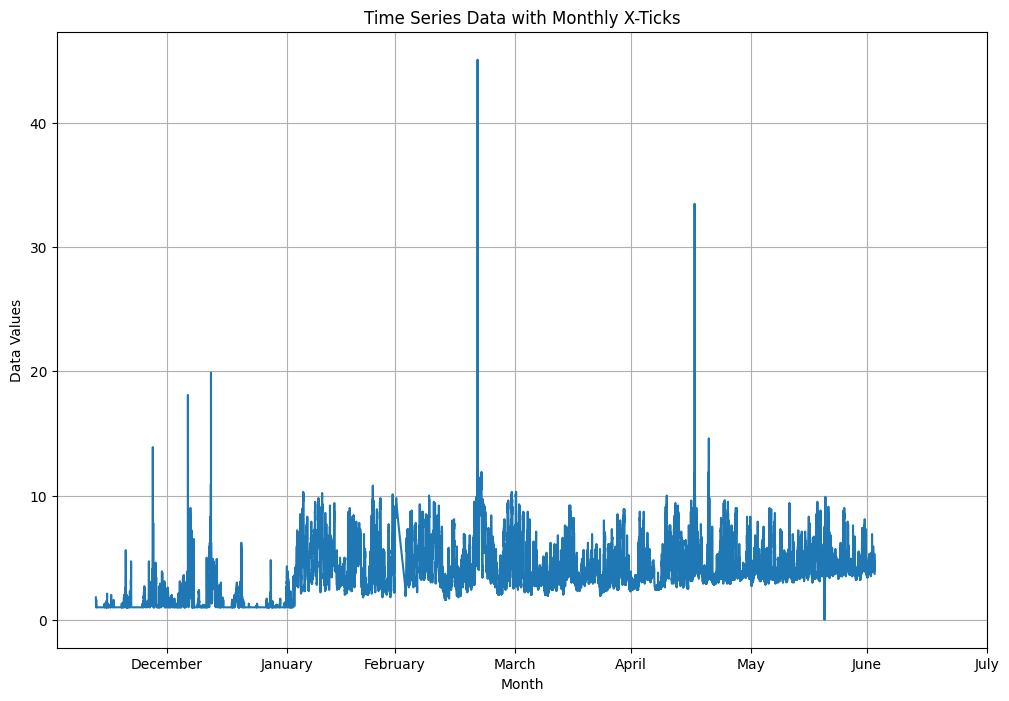

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters

# Sample time series data (replace this with your own data)
# Assuming 'timestamps' is a list of datetime objects with 5-minute intervals
# For example: timestamps = pd.date_range(start='2023-01-01', end='2023-10-12', freq='5T')
# timestamps = pd.date_range(start='2022-12-12 16:33:00', end='2023-10-12', freq='5T')
timestamps = df9["시간"][:]
data = df9["ou"] # Replace this with your actual data

# Create a DataFrame with timestamps and data
df = pd.DataFrame({'Timestamp': timestamps, 'Data': data})

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Data'])

# Formatting x-axis to show only months
plt.xticks(df.resample('M').mean().index, [x.strftime('%B') for x in df.resample('M').mean().index])
# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Data Values')
plt.title('Time Series Data with Monthly X-Ticks')
plt.grid(True)

# Plotting Histograms of the four main features

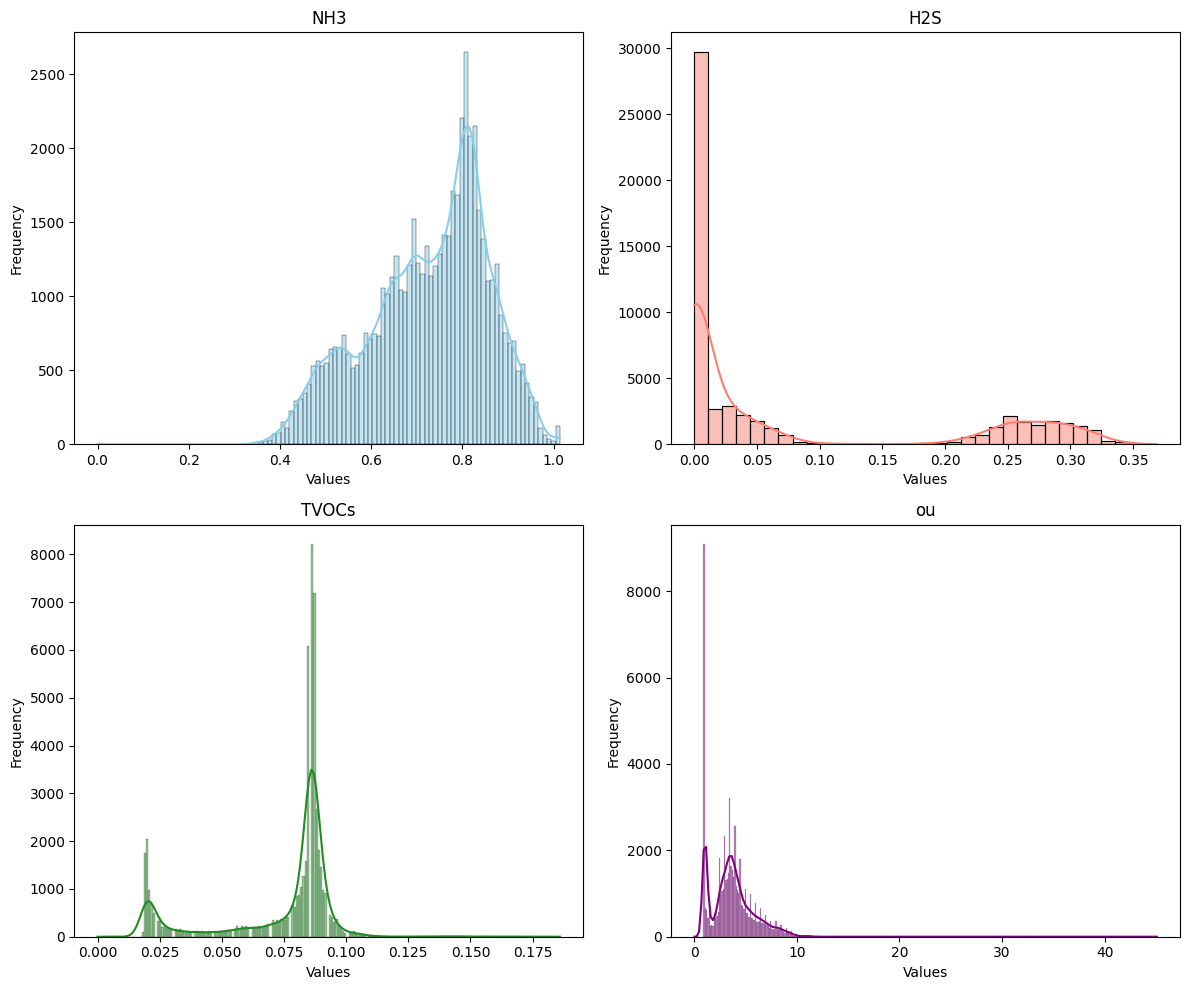

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first histogram (top-left)
sns.histplot(df9['NH3'], kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_xlabel("Values")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("NH3")

# Plot the second histogram (top-right)
sns.histplot(df9['H2S'], kde=True, color='salmon', ax=axs[0, 1])
axs[0, 1].set_xlabel("Values")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("H2S")

# Plot the third histogram (bottom-left)
sns.histplot(df9['TVOCs'], kde=True, color='forestgreen', ax=axs[1, 0])
axs[1, 0].set_xlabel("Values")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].set_title("TVOCs")

# Plot the fourth histogram (bottom-right)
sns.histplot(df9['ou'], kde=True, color='purple', ax=axs[1, 1])
axs[1, 1].set_xlabel("Values")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title("ou")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Getting rid of outliers

In [ ]:
#Threshold

df9.drop(df9[df9["ou"]>15].index, inplace=True)
df9.drop(df9[df9["TVOCs"]>0.11].index, inplace=True)
df9.drop(df9[df9["NH3"]<0.3].index, inplace=True)

# Normalization

In [ ]:
# indx15 = df9["ou"][df9["ou"] > 15].index

# for i in indx15:
#   if df9['ou'][i] > 15:
#     df9["ou"][i] = 15


# df9['ou'] = df9["ou"] / 15

# df9['humidity'] = df9["humidity"] / 10

# df9["temperature"] = (df9["temperature"] - df9["temperature"].mean()) / (df9["temperature"].max() - df9["temperature"].min())

#Visualizing feature importance using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your data
regressor.fit(df9[['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'atm', 'pozip']], df9['ou'])


# Get feature importances from the trained regressor
feature_importances = regressor.feature_importances_


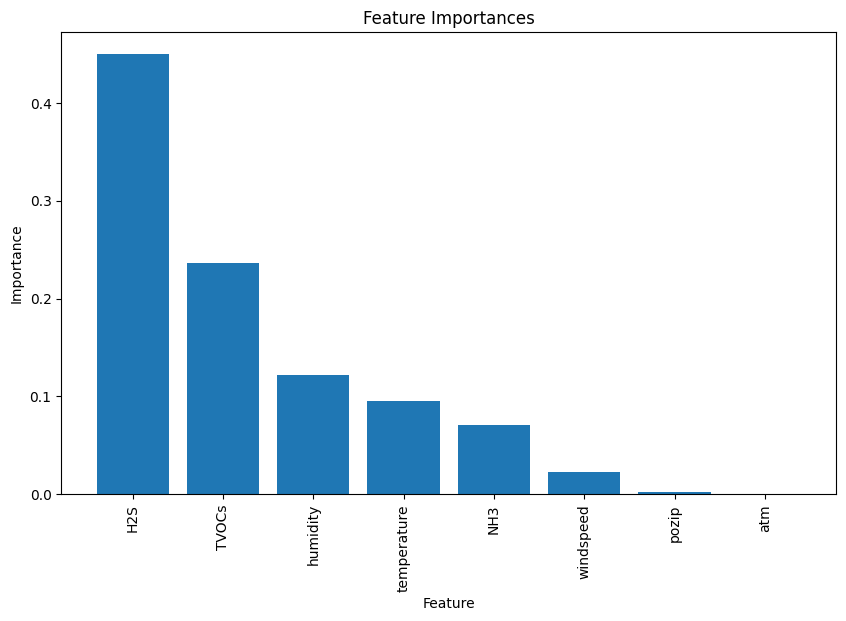

In [ ]:
# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features (assuming they are in a list or DataFrame)
feature_names = df9[['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'atm', 'pozip']].columns  # Change this to your actual feature names

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


# Decomposing Time Series: Seasonal, Trends, Residual


In [ ]:
df9.tail()

,시간,ou,NH3,H2S,TVOCs,pozip,temperature,humidity,winddirection,windspeed,atm
55887,2023-07-01 23:39:00,4.3,0.616,0.0,0.022,0,24.7,8.7,북,0.0,0
55888,2023-07-01 23:44:00,4.2,0.622,0.0,0.022,0,24.6,8.7,북,0.0,0
55889,2023-07-01 23:49:00,4.3,0.621,0.0,0.022,0,24.6,8.8,북,0.0,0
55890,2023-07-01 23:54:00,4.1,0.623,0.0,0.022,0,24.5,8.8,북,0.0,0
55891,2023-07-01 23:59:00,3.7,0.613,0.0,0.021,0,24.2,8.9,서,0.1,0


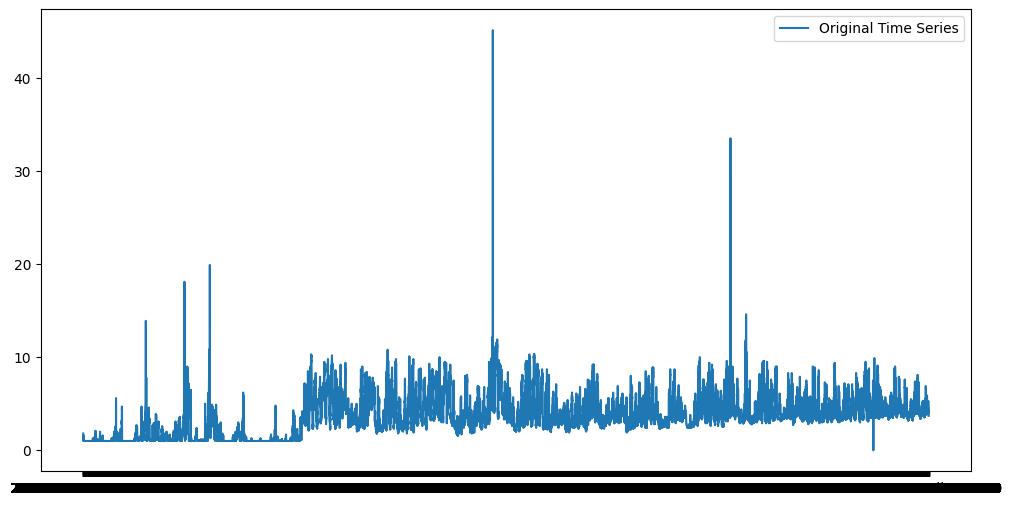

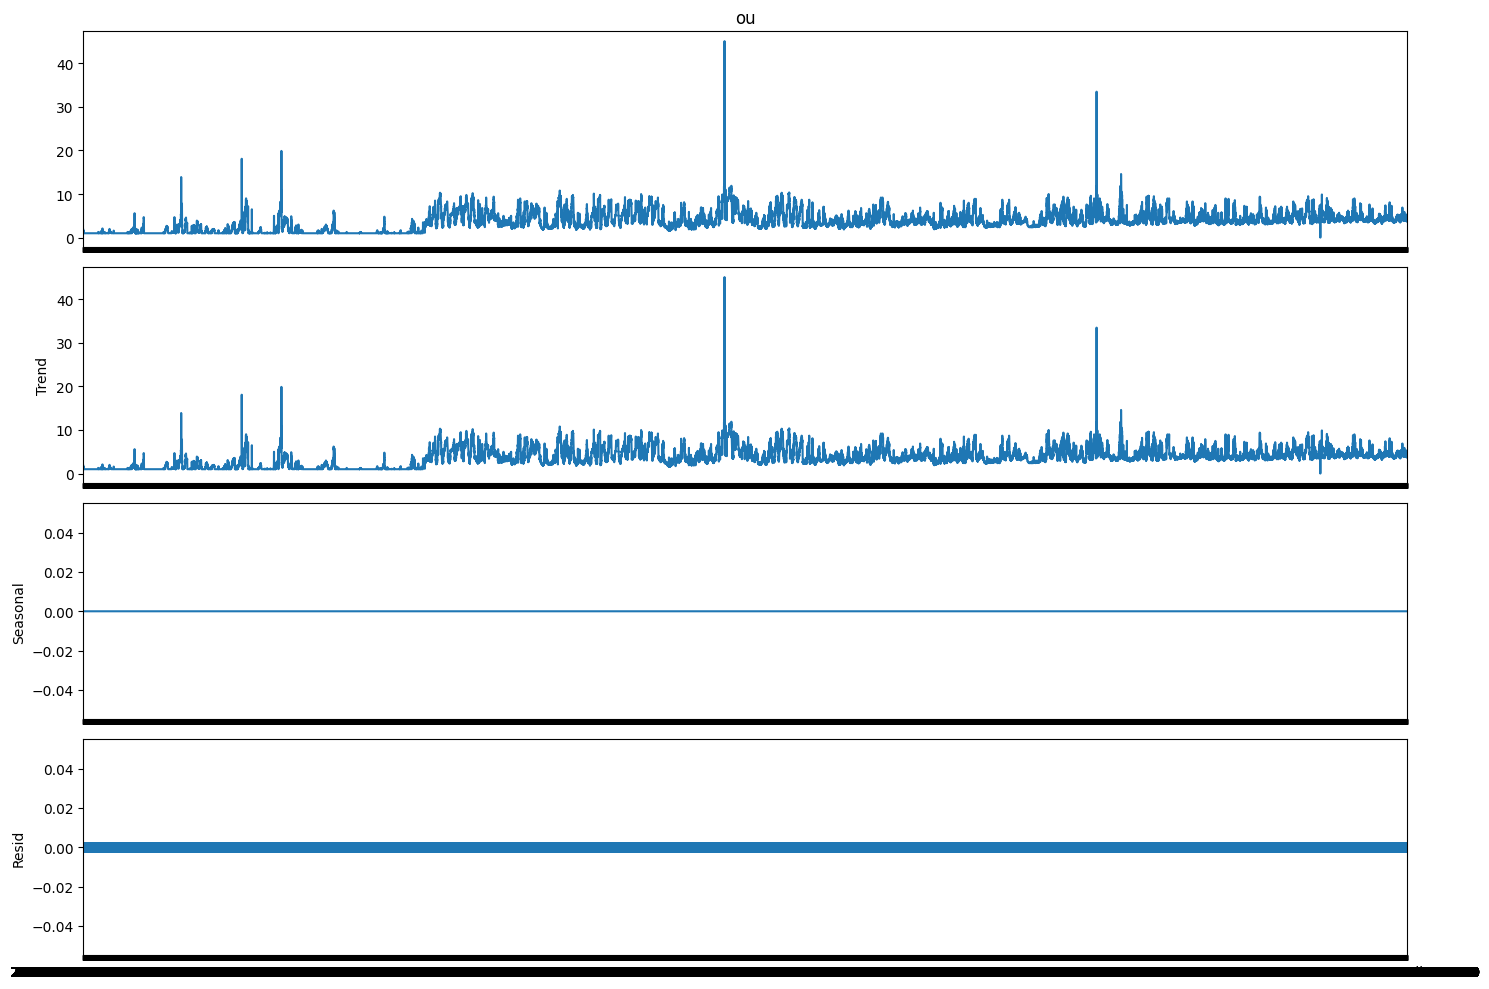

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data
df = pd.read_excel('/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(109지점).xls.xlsx', parse_dates=True, index_col='시간')

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df['ou'], label='Original Time Series')
plt.legend()
plt.show()

# Decompose to visualize trend, seasonality, and residuals
result = seasonal_decompose(df['ou'], model='additive', period=1)
result.plot()
plt.show()


In [ ]:
new_df_add1 = pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis=1)
new_df_add1.columns = ['seasonality', 'trend', 'residual', 'actual_values']
new_df_add1.head(5)

,seasonality,trend,residual,actual_values
시간,,,,
2022-12-12 16:33:00,0.0,1.8,0.0,1.8
2022-12-12 16:39:00,0.0,1.6,0.0,1.6
2022-12-12 16:44:00,0.0,1.4,0.0,1.4
2022-12-12 16:49:00,0.0,1.3,0.0,1.3
2022-12-12 16:54:00,0.0,1.2,0.0,1.2


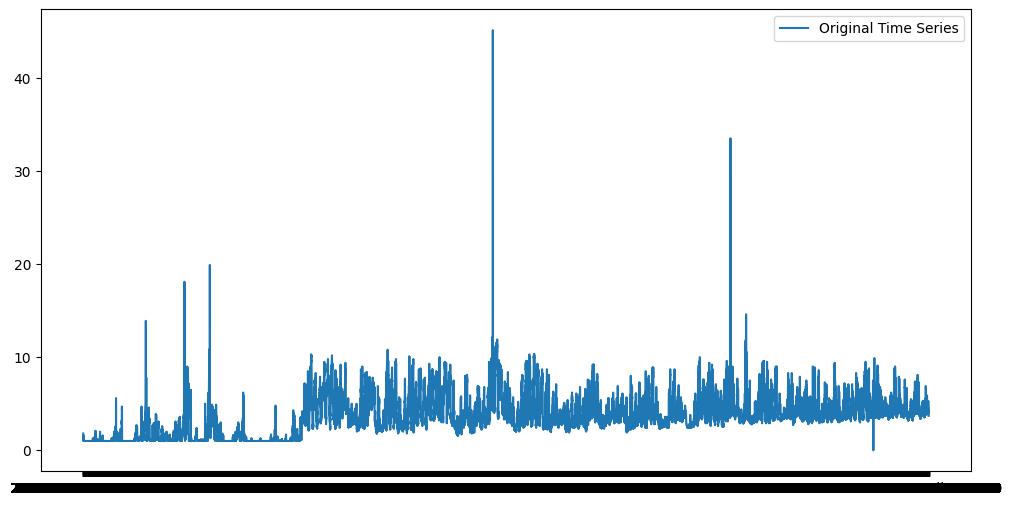

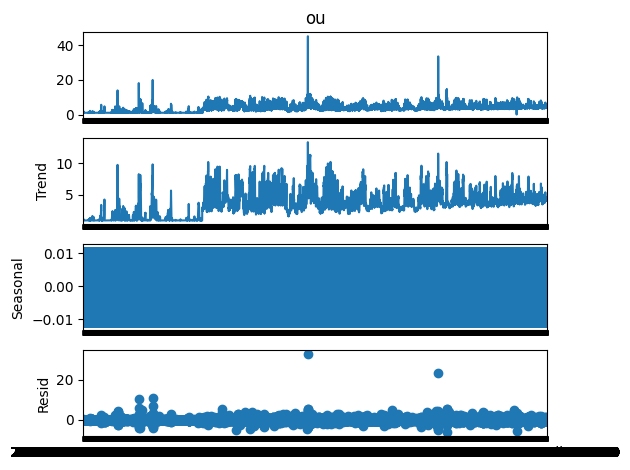

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data
df = pd.read_excel('/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(109지점).xls.xlsx', parse_dates=True, index_col='시간')

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df['ou'], label='Original Time Series')
plt.legend()
plt.show()

# Decompose to visualize trend, seasonality, and residuals
result_monthly = seasonal_decompose(df['ou'], model='additive', period=12)
result_monthly.plot()
plt.show()


In [ ]:
new_df_monthly = pd.concat([result_monthly.seasonal, result_monthly.trend, result_monthly.resid, result_monthly.observed], axis=1)
new_df_monthly.columns = ['seasonality', 'trend', 'residual', 'actual_values']
new_df_monthly.head(5)

,seasonality,trend,residual,actual_values
시간,,,,
2022-12-12 16:33:00,-0.008292,NaN,NaN,1.8
2022-12-12 16:39:00,-0.009909,NaN,NaN,1.6
2022-12-12 16:44:00,-0.012188,NaN,NaN,1.4
2022-12-12 16:49:00,-0.009367,NaN,NaN,1.3
2022-12-12 16:54:00,0.004043,NaN,NaN,1.2


In [ ]:
df9.head()

,NH3,H2S,TVOCs,pozip,temperature,humidity,winddirection,windspeed,atm
ou,,,,,,,,,
1970-01-01 00:00:00.000000001,0.836,0.369,0.100,0,6.9,6.3,남,1.0,0
1970-01-01 00:00:00.000000001,0.828,0.353,0.098,0,6.9,6.3,남남동,2.2,0
1970-01-01 00:00:00.000000001,0.821,0.338,0.098,0,6.9,6.3,남,1.0,0
1970-01-01 00:00:00.000000001,0.815,0.326,0.097,0,6.9,6.3,남남동,1.4,0
1970-01-01 00:00:00.000000001,0.809,0.323,0.096,0,6.9,6.4,남,1.1,0


In [ ]:
#df9['시간'] = pd.to_datetime(df9['시간'])
#df9.set_index('시간', inplace=True)

# Specify the start date
start_date = '2023-12-17'

# Filter the DataFrame from the specified start date
filtered_df = df9.loc[start_date:]

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# datetime index
#df9['ou'] = pd.to_datetime(df9['ou'])

#df9['시간'] = pd.to_datetime(df9['시간'])
#df9.set_index('시간', inplace=True)

# Specify the start date
#start_date = '2022-12-17'

# Filter the DataFrame from the specified start date
#filtered_df = df9[df9.index >= start_date]

# Decompose the time series using an additive model
result = seasonal_decompose(filtered_df['ou'], model='additive', period=1 )

# trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df9['ou'], label='Time Series')
plt.legend()
plt.show()

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(residual, label='Residuals')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.tight_layout()
plt.show()


NameError: ignored

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

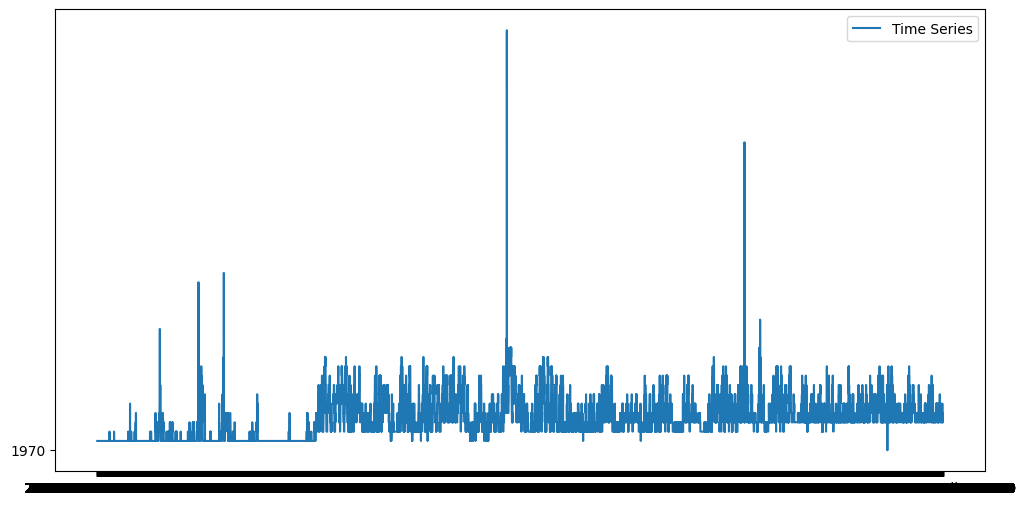

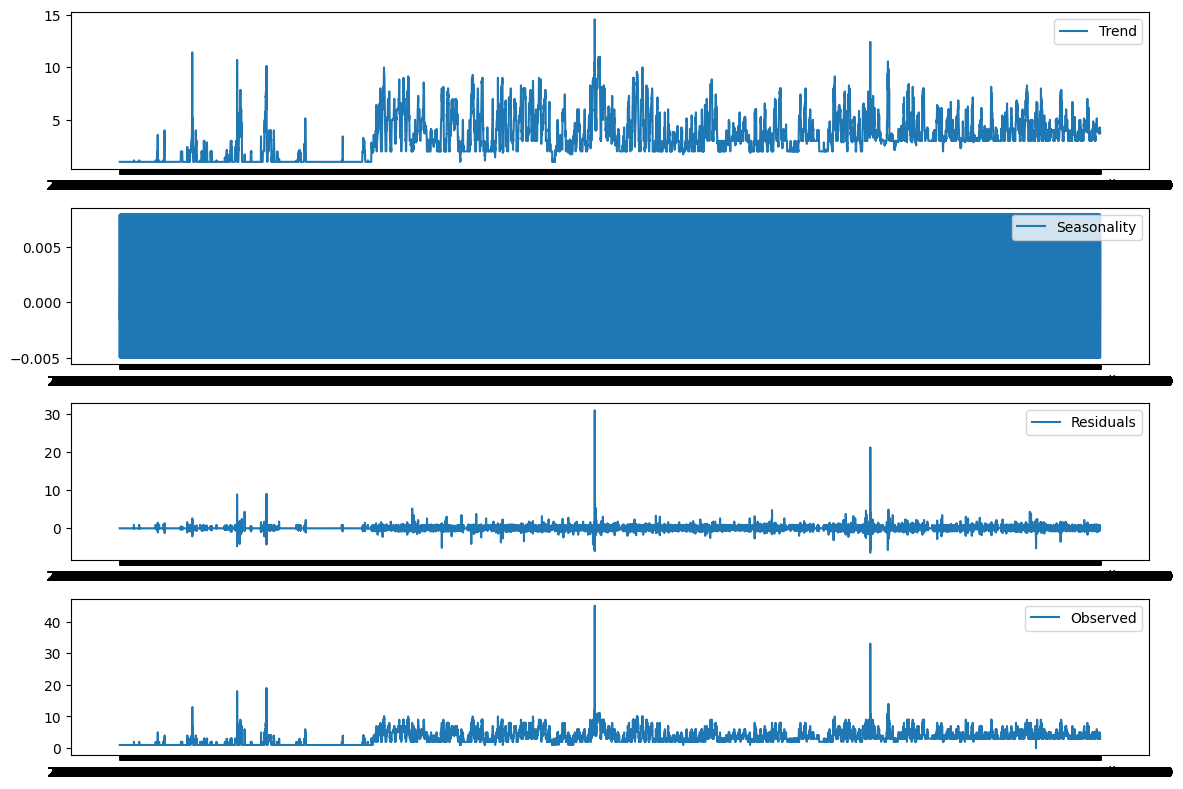

In [ ]:

# Load time series data
df9 = pd.read_excel('/content/drive/MyDrive/BlueSky_dataset/2022-12-01-2023-07-01(109지점).xls.xlsx', parse_dates=True, index_col='시간')

df9['ou'] = pd.to_datetime(df9['ou'])

# Decompose the time series
result = seasonal_decompose(df9['ou'], model='additive', period=7)

# Plot original time series
plt.figure(figsize=(12, 6))
plt.plot(df9['ou'], label='Time Series')
plt.legend()
plt.show()

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.seasonal, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
new_df_add = pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis=1)
new_df_add.columns = ['seasonality', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasonality,trend,residual,actual_values
시간,,,,
2022-12-12 16:33:00,-0.004267,NaN,NaN,1.8
2022-12-12 16:39:00,0.001387,NaN,NaN,1.6
2022-12-12 16:44:00,0.004297,NaN,NaN,1.4
2022-12-12 16:49:00,0.007263,1.357143,-0.064406,1.3
2022-12-12 16:54:00,-0.001622,1.271429,-0.069806,1.2


In [ ]:
df9.head()

,ou,NH3,H2S,TVOCs,pozip,temperature,humidity,winddirection,windspeed,atm
시간,,,,,,,,,,
2022-12-12 16:33:00,1.8,0.836,0.369,0.100,0,6.9,6.3,남,1.0,0
2022-12-12 16:39:00,1.6,0.828,0.353,0.098,0,6.9,6.3,남남동,2.2,0
2022-12-12 16:44:00,1.4,0.821,0.338,0.098,0,6.9,6.3,남,1.0,0
2022-12-12 16:49:00,1.3,0.815,0.326,0.097,0,6.9,6.3,남남동,1.4,0
2022-12-12 16:54:00,1.2,0.809,0.323,0.096,0,6.9,6.4,남,1.1,0


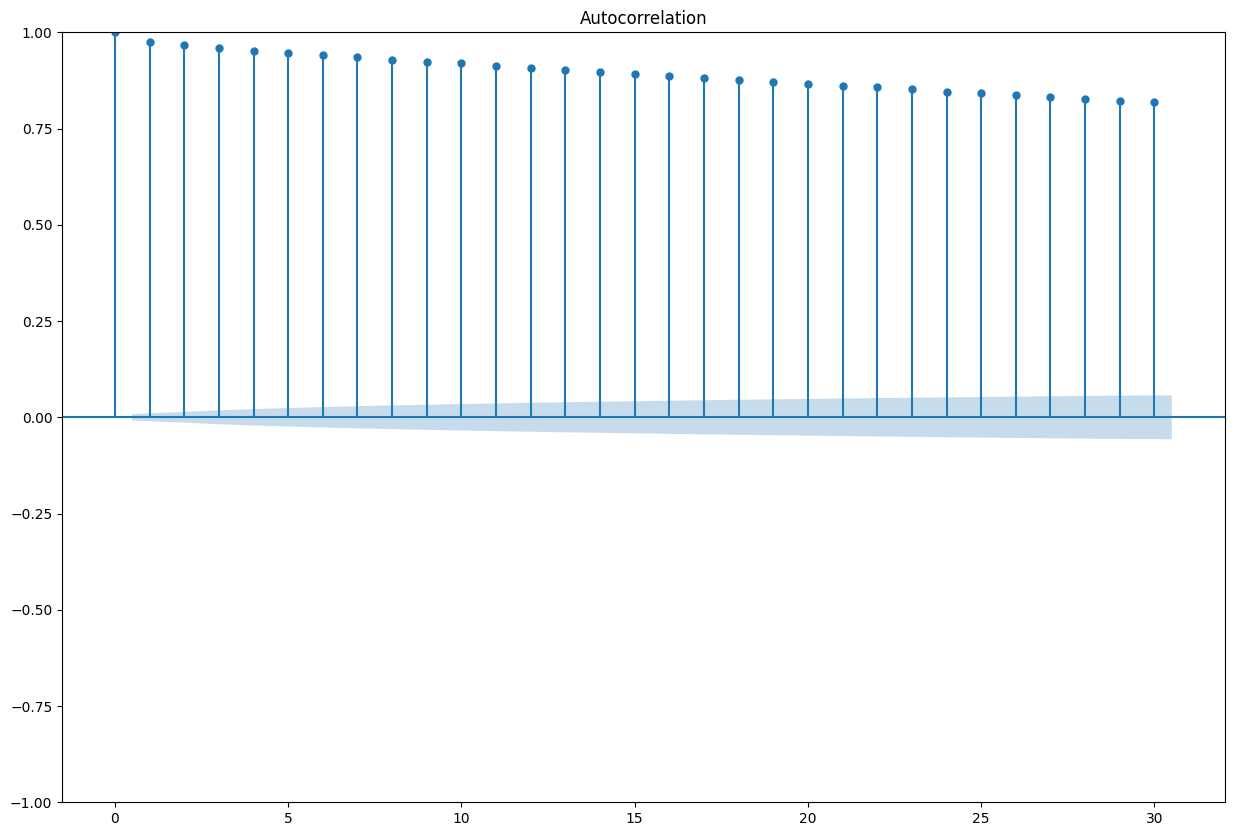

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation function (ACF)
plot_acf(df['ou'], lags=30)
plt.show()

In [ ]:
##adfuller test to check stationarity
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df9.ou.values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')
print(f' p Value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
  print('Critical Values: ')
  print(f'  {key}, {value}')

ADF Statistic: -13.646139650772513
 p Value: 1.6182765448185315e-25
Critical Values: 
  1%, -3.4304671257776023
Critical Values: 
  5%, -2.8615917673074613
Critical Values: 
  10%, -2.566797554004905


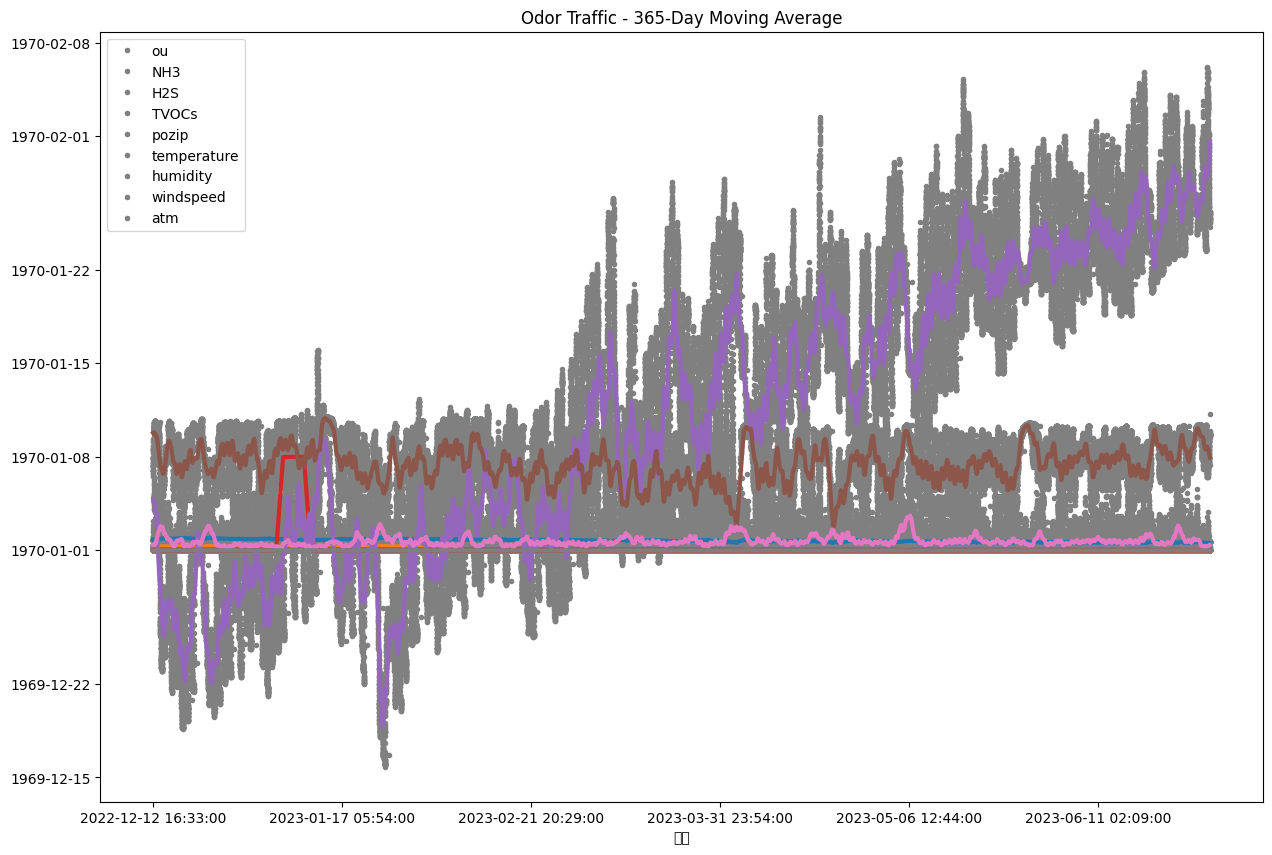

In [ ]:
moving_average = df9.rolling(
    window=365,       # 365-day window
    center=True,      # average at the center of the window
    min_periods=183,
).mean()              # the mean

ax = df9.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Odor Traffic - 365-Day Moving Average", legend=False,
);

# Extra Trees Regressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
df9
#df9.info()

,시간,ou,NH3,H2S,TVOCs,pozip,temperature,humidity,winddirection,windspeed,atm
0,2022-12-12 16:33:00,1.8,0.836,0.369,0.100,0,6.9,6.3,남,1.0,0
1,2022-12-12 16:39:00,1.6,0.828,0.353,0.098,0,6.9,6.3,남남동,2.2,0
2,2022-12-12 16:44:00,1.4,0.821,0.338,0.098,0,6.9,6.3,남,1.0,0
3,2022-12-12 16:49:00,1.3,0.815,0.326,0.097,0,6.9,6.3,남남동,1.4,0
4,2022-12-12 16:54:00,1.2,0.809,0.323,0.096,0,6.9,6.4,남,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...
55887,2023-07-01 23:39:00,4.3,0.616,0.000,0.022,0,24.7,8.7,북,0.0,0
55888,2023-07-01 23:44:00,4.2,0.622,0.000,0.022,0,24.6,8.7,북,0.0,0
55889,2023-07-01 23:49:00,4.3,0.621,0.000,0.022,0,24.6,8.8,북,0.0,0
55890,2023-07-01 23:54:00,4.1,0.623,0.000,0.022,0,24.5,8.8,북,0.0,0


In [ ]:
df9.describe()

,ou,NH3,H2S,TVOCs,pozip,temperature,humidity,windspeed,atm
count,55892.000000,55892.000000,55892.000000,55892.000000,55892.000000,55892.000000,55892.000000,55892.000000,55892.0
mean,3.658071,0.726118,0.078564,0.073722,0.183479,10.229695,6.405199,0.679777,0.0
std,2.043489,0.130832,0.116483,0.024290,1.118351,11.179800,2.256654,0.814610,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,-16.200000,0.000000,0.000000,0.0
25%,2.300000,0.639000,0.000000,0.070000,0.000000,1.000000,4.800000,0.100000,0.0
50%,3.500000,0.749000,0.002000,0.085000,0.000000,9.900000,6.600000,0.400000,0.0
75%,4.700000,0.822500,0.215000,0.087000,0.000000,19.900000,8.400000,1.000000,0.0
max,45.100000,1.014000,0.369000,0.186000,7.000000,36.200000,10.000000,9.400000,0.0


In [ ]:
x = df9.drop(['ou', '시간', 'winddirection', 'pozip', 'atm'], axis=1)
y = df9['ou']

In [ ]:
x

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = pd.DataFrame(MinMaxScaler().fit(x).transform(x))

In [ ]:
col = ['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed']

In [ ]:
model = ExtraTreesRegressor()

In [ ]:
model.fit(x, y)

ExtraTreesRegressor()

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index = col)
feature_importance


NH3            0.072201
H2S            0.473393
TVOCs          0.183985
temperature    0.099603
humidity       0.135205
windspeed      0.035613
dtype: float64

<Axes: >

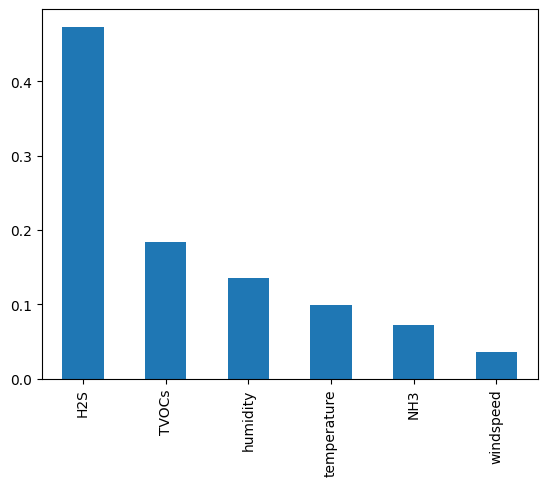

In [ ]:
feature_importance.nlargest(6).plot(kind = 'bar')

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25)

In [ ]:
model.fit(x_train, y_train)

ExtraTreesRegressor()

In [ ]:
Regressor_pred = model.predict(x_test)

In [ ]:
y_test_short = y_test[:400]
Regressor_pred_short = Regressor_pred[:400]

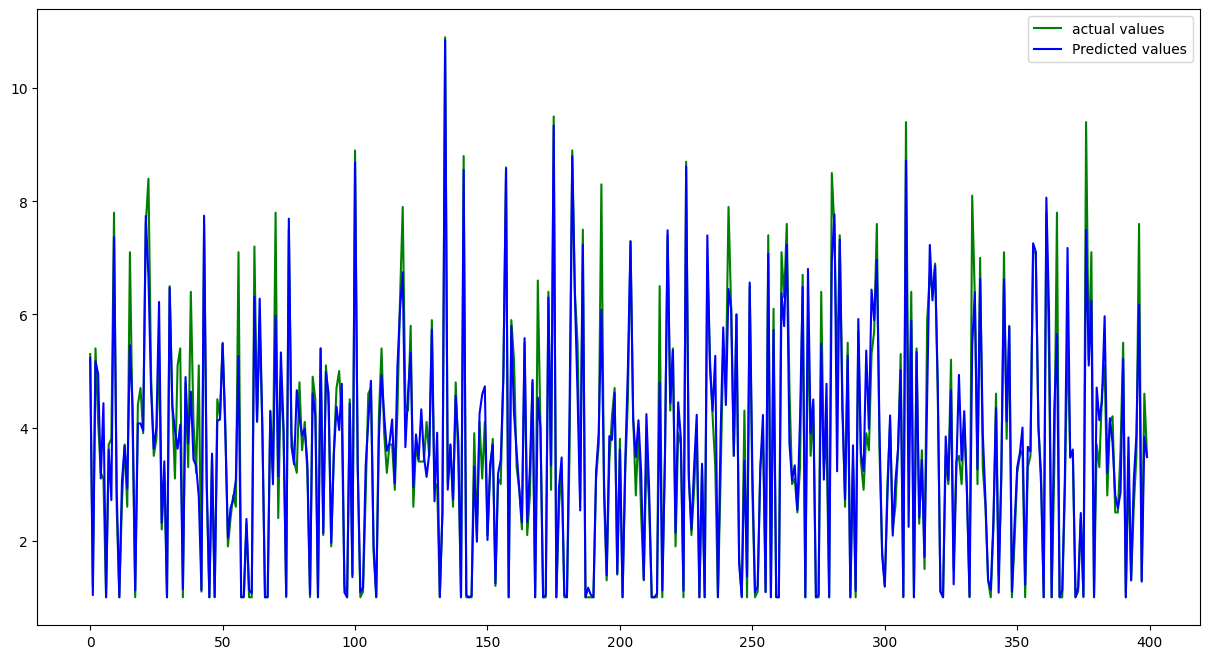

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test_short))],y_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y_test_short))],Regressor_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
# Evaluating model performance
print('R-square is :', r2_score(y_test, Regressor_pred))

R-square is : 0.9245653246993417


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Regressor_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.3167561374575571


# Predict on other dataset

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'ExtraTreeRegressor.pkl')


['ExtraTreeRegressor.pkl']

In [ ]:
model = joblib.load('ExtraTreeRegressor.pkl')


###df8

In [ ]:
file_path86 = '/content/2022-12-01-2023-07-01(108┴÷┴í).xlsx'
df8 = pd.read_excel(file_path86)

In [ ]:
x8 = df8.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y8 = df8['ou']

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the dataset
x8_train, x8_test, y8_train, y8_test=train_test_split(x8, y8, test_size=0.25)

In [ ]:
model.fit(x8_train, y8_train)

ExtraTreesRegressor()

In [ ]:
Regressor8_pred = model.predict(x8_test)

In [ ]:
y8_test_short = y8_test[:400]
Regressor8_pred_short = Regressor8_pred[:400]

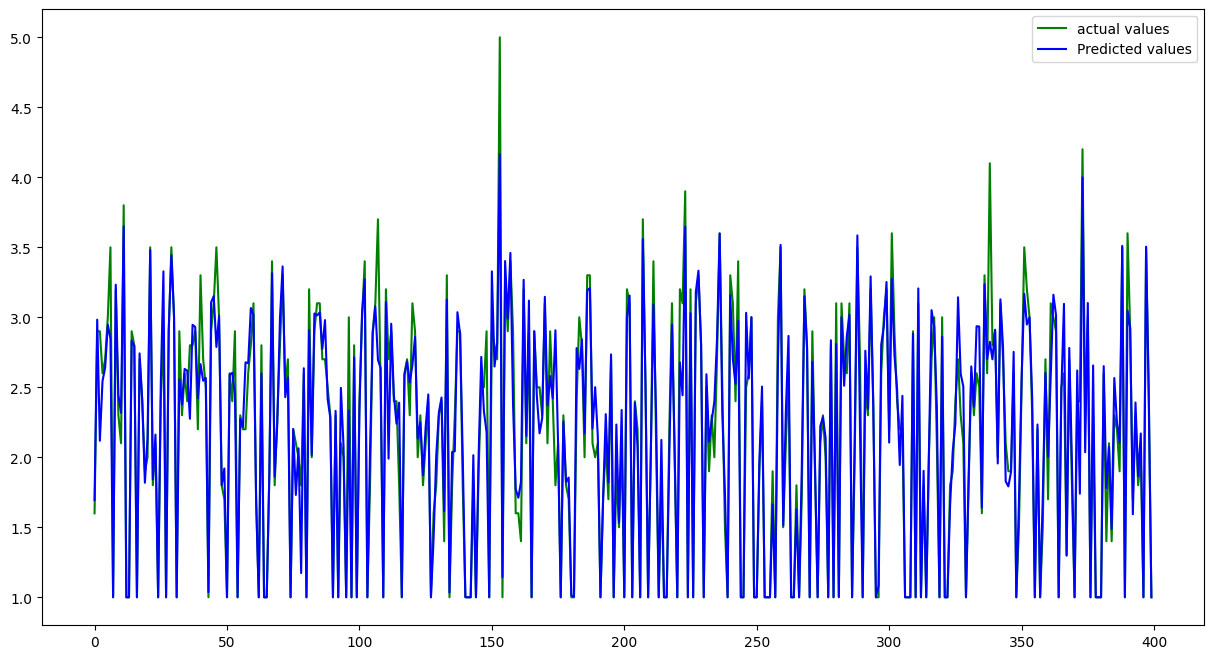

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y8_test_short))],y8_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y8_test_short))],Regressor8_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
# Evaluating model performance
print('R-square is :', r2_score(y8_test, Regressor8_pred))

R-square is : 0.21912543598425593


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y8_test, Regressor8_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.459174284468704


### df7

In [ ]:
file_path76 = '/content/2022-12-01-2023-07-01(107┴÷┴í).xlsx'
df7 = pd.read_excel(file_path76)

In [ ]:
x7 = df7.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y7 = df7['ou']

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the dataset
x7_train, x7_test, y7_train, y7_test=train_test_split(x7, y7, test_size=0.25)

In [ ]:
model.fit(x7_train, y7_train)

ExtraTreesRegressor()

In [ ]:
Regressor7_pred = model.predict(x7_test)

In [ ]:
y7_test_short = y7_test[:400]
Regressor7_pred_short = Regressor7_pred[:400]

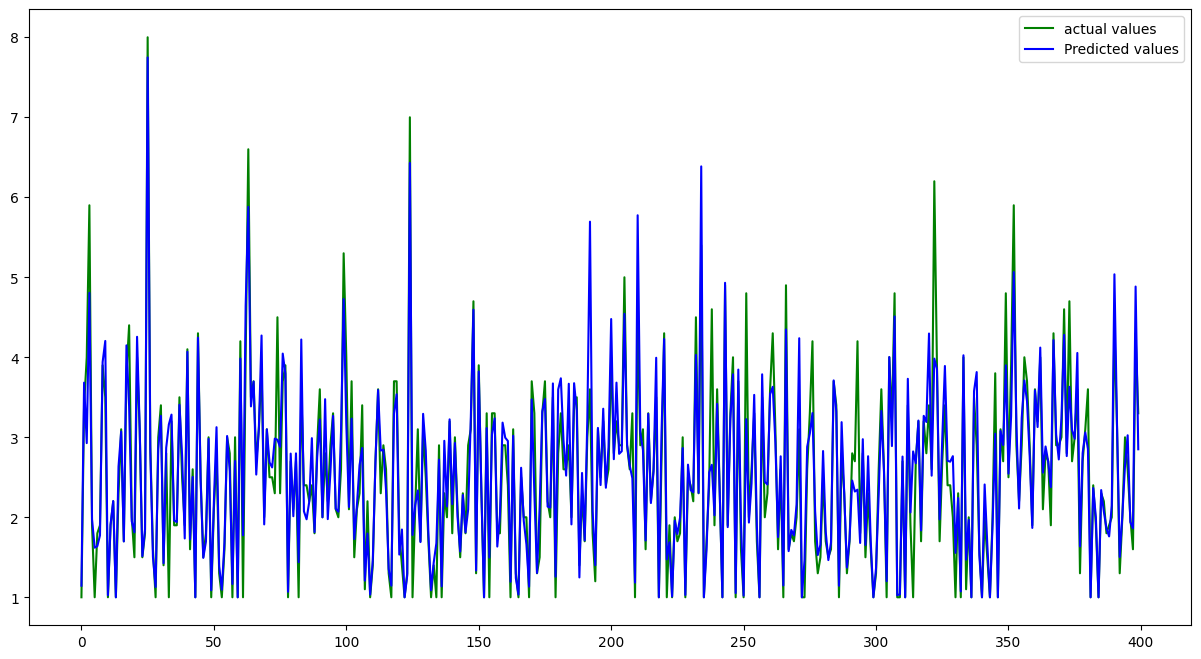

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y7_test_short))],y7_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y7_test_short))],Regressor7_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
# Evaluating model performance
print('R-square is :', r2_score(y7_test, Regressor7_pred))
print('Mean Squared Error is: ', mean_squared_error(y7_test, Regressor7_pred))

R-square is : 0.9773495518723951
Mean Squared Error is:  35.7057622593426


### df6

In [ ]:
file_path66 = '/content/2022-12-01-2023-07-01(106┴÷┴í).xlsx'
df6 = pd.read_excel(file_path66)

In [ ]:
x6 = df6.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y6 = df6['ou']

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the dataset
x6_train, x6_test, y6_train, y6_test=train_test_split(x6, y6, test_size=0.25)

In [ ]:
model.fit(x6_train, y6_train)

ExtraTreesRegressor()

In [ ]:
Regressor6_pred = model.predict(x6_test)

y6_test_short = y6_test[:400]
Regressor6_pred_short = Regressor6_pred[:400]

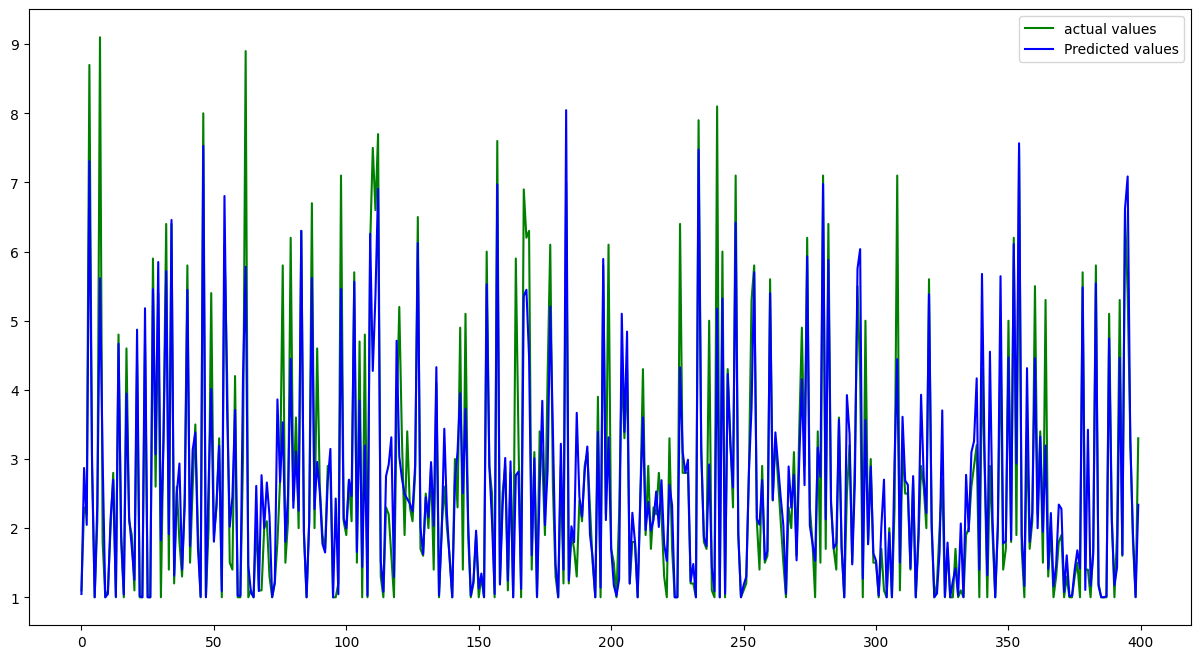

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y6_test_short))],y6_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y6_test_short))],Regressor6_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
# Evaluating model performance
print('R-square is :', r2_score(y6_test, Regressor6_pred))
print('Mean Squared Error is: ', mean_squared_error(y6_test, Regressor6_pred))

R-square is : 0.8231096935845128
Mean Squared Error is:  0.5312851854383986


### df5

In [ ]:
file_path56 = '/content/2022-12-01-2023-07-01(105┴÷┴í).xlsx'
df5 = pd.read_excel(file_path56)

x5 = df5.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y5 = df5['ou']

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the dataset
x5_train, x5_test, y5_train, y5_test=train_test_split(x5, y5, test_size=0.25)

In [ ]:
model.fit(x5_train, y5_train)

ExtraTreesRegressor()

In [ ]:
Regressor5_pred = model.predict(x5_test)

y5_test_short = y5_test[:400]
Regressor5_pred_short = Regressor5_pred[:400]

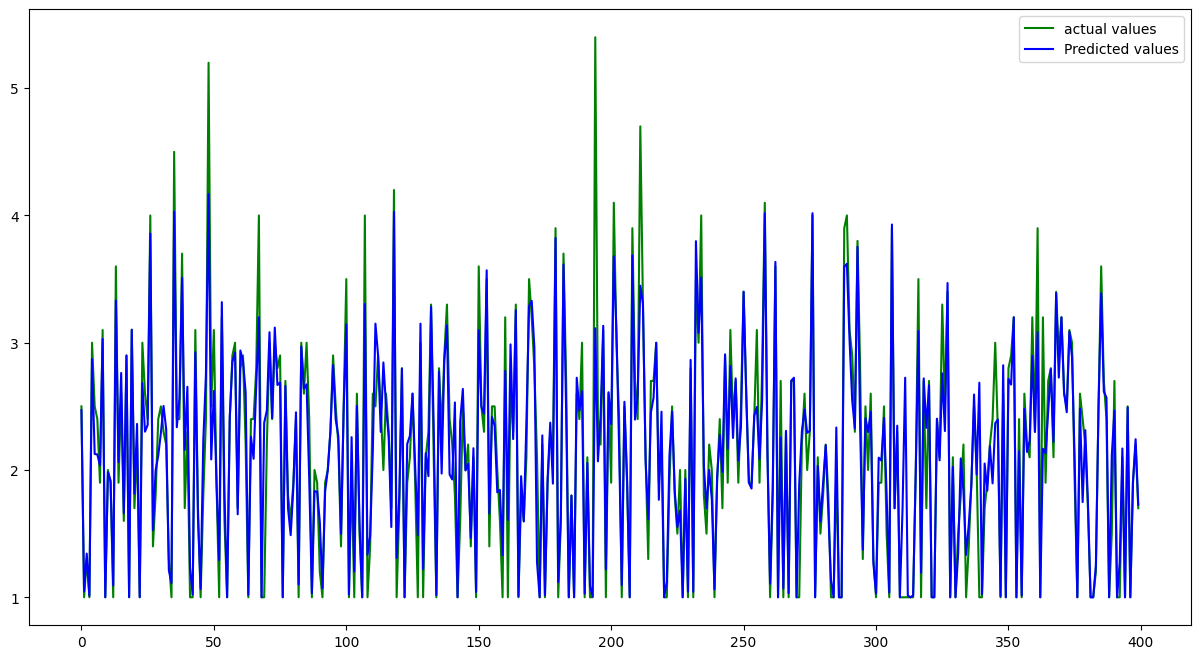

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y5_test_short))],y5_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y5_test_short))],Regressor5_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
# Evaluating model performance
print('R-square is :', r2_score(y5_test, Regressor5_pred))
print('Mean Squared Error is: ', mean_squared_error(y5_test, Regressor5_pred))

R-square is : 0.7745091695952058
Mean Squared Error is:  0.19267706004156526


### df4

In [ ]:
file_path46 = '/content/2022-12-01-2023-07-01(104┴÷┴í).xlsx'
df4 = pd.read_excel(file_path46)

x4 = df4.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y4 = df4['ou']

from sklearn.model_selection import train_test_split
# splitting the dataset
x4_train, x4_test, y4_train, y4_test=train_test_split(x4, y4, test_size=0.25)

In [ ]:
model.fit(x4_train, y4_train)

Regressor4_pred = model.predict(x4_test)

y4_test_short = y4_test[:400]
Regressor4_pred_short = Regressor4_pred[:400]

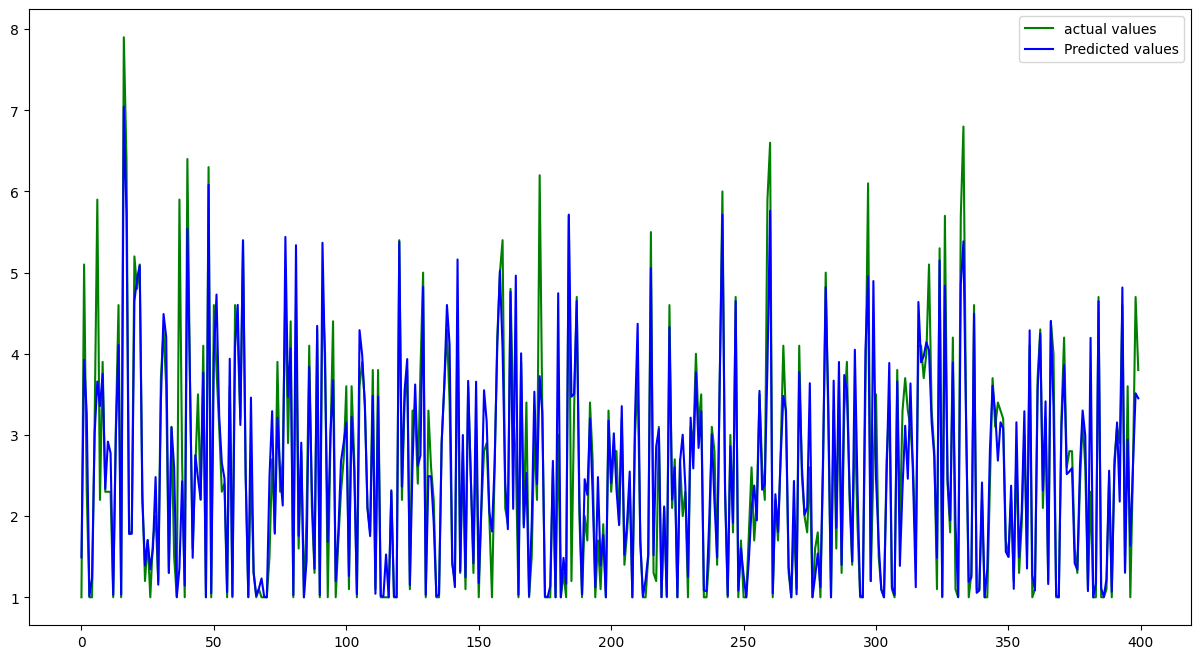

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y4_test_short))],y4_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y4_test_short))],Regressor4_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
# Evaluating model performance
print('R-square is :', r2_score(y4_test, Regressor4_pred))
print('Mean Squared Error is: ', mean_squared_error(y4_test, Regressor4_pred))

R-square is : 0.8438937585941512
Mean Squared Error is:  0.3560973397882929


### df3

In [ ]:
file_path36 = '/content/2022-12-01-2023-07-01(103┴÷┴í).xlsx'
df3 = pd.read_excel(file_path36)

x3 = df3.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y3 = df3['ou']

from sklearn.model_selection import train_test_split
# splitting the dataset
x3_train, x3_test, y3_train, y3_test=train_test_split(x3, y3, test_size=0.25)

In [ ]:
model.fit(x3_train, y3_train)

Regressor3_pred = model.predict(x3_test)

y3_test_short = y3_test[:400]
Regressor3_pred_short = Regressor3_pred[:400]

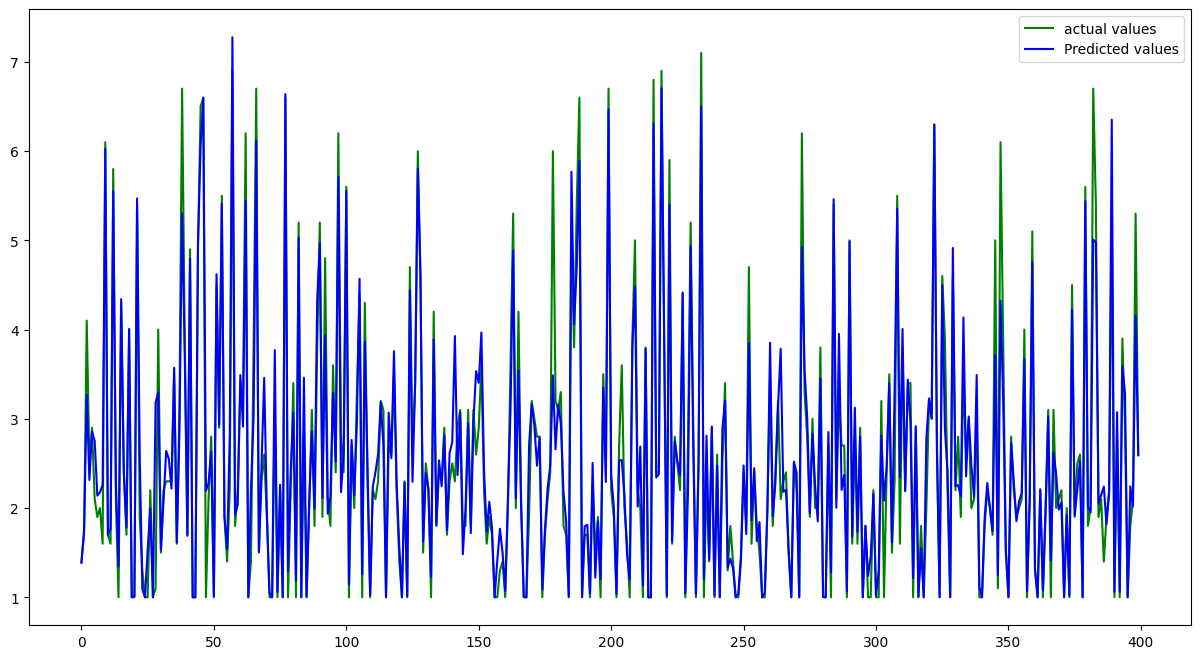

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y3_test_short))],y3_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y3_test_short))],Regressor3_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
# Evaluating model performance
print('R-square is :', r2_score(y3_test, Regressor3_pred))
print('Mean Squared Error is: ', mean_squared_error(y3_test, Regressor3_pred))

R-square is : 0.8753907588932988
Mean Squared Error is:  0.24736372497230416


### df2

In [ ]:
file_path26 = '/content/2022-12-01-2023-07-01(102┴÷┴í).xlsx'
df2 = pd.read_excel(file_path26)

x2 = df2.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y2 = df2['ou']

from sklearn.model_selection import train_test_split
# splitting the dataset
x2_train, x2_test, y2_train, y2_test=train_test_split(x2, y2, test_size=0.25)

In [ ]:
model.fit(x2_train, y2_train)

Regressor2_pred = model.predict(x2_test)

y2_test_short = y2_test[:400]
Regressor2_pred_short = Regressor2_pred[:400]

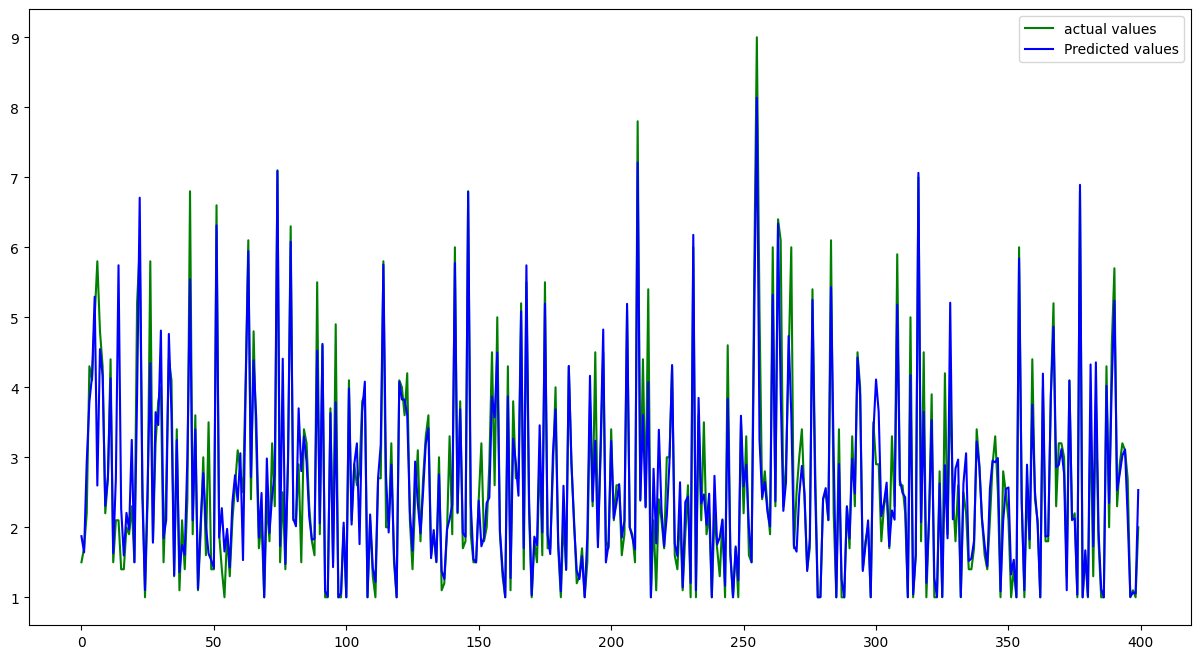

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y2_test_short))],y2_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y2_test_short))],Regressor2_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
# Evaluating model performance
print('R-square is :', r2_score(y2_test, Regressor2_pred))
print('Mean Squared Error is: ', mean_squared_error(y2_test, Regressor2_pred))

R-square is : 0.8638889524132864
Mean Squared Error is:  0.3576737284062012


### df1

In [ ]:
file_path16 = '/content/2022-12-01-2023-07-01(101┴÷┴í).xlsx'
df1 = pd.read_excel(file_path16)

x1 = df1.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y1 = df1['ou']

from sklearn.model_selection import train_test_split
# splitting the dataset
x1_train, x1_test, y1_train, y1_test=train_test_split(x1, y1, test_size=0.25)

In [ ]:
model.fit(x1_train, y1_train)

Regressor1_pred = model.predict(x1_test)

y1_test_short = y1_test[:400]
Regressor1_pred_short = Regressor1_pred[:400]

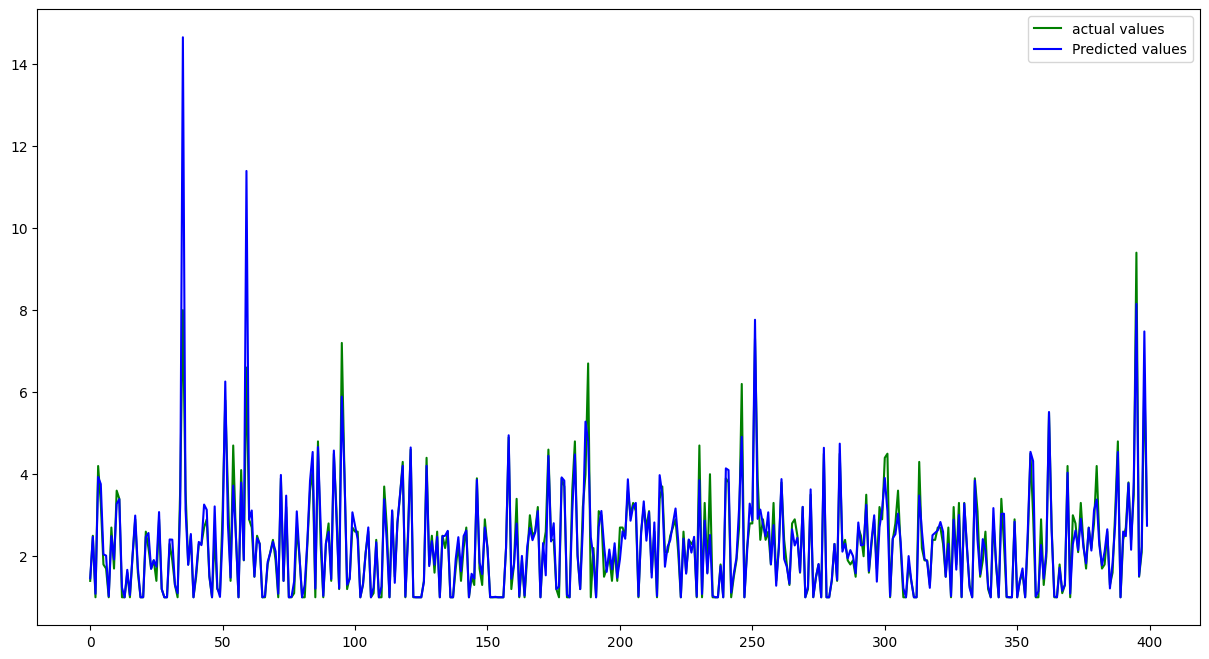

In [ ]:
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y1_test_short))],y1_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y1_test_short))],Regressor1_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
# Evaluating model performance
print('R-square is :', r2_score(y1_test, Regressor1_pred))
print('Mean Squared Error is: ', mean_squared_error(y1_test, Regressor1_pred))

R-square is : 0.590793471615525
Mean Squared Error is:  3.2776558332726924


# Classification

Extra trees classifier

In [ ]:
file_path86 = '/content/2022-12-01-2023-07-01(108┴÷┴í).xlsx'
df8 = pd.read_excel(file_path86)

In [ ]:
x8 = df8.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y8 = df8['ou']

In [ ]:
df8

,지점,시간,ou,NH3,H2S,TVOCs,temperature,humidity,winddirection,windspeed,atm
0,108번,2022-12-12 15:54:00,1.1,0.272,0.370,0.056,6.7,6.2,남,0.9,0
1,108번,2022-12-12 15:59:00,1.0,0.259,0.339,0.058,6.7,6.2,남,0.6,0
2,108번,2022-12-12 16:04:00,1.0,0.250,0.327,0.026,6.7,6.2,남남서,1.6,0
3,108번,2022-12-12 16:09:00,1.0,0.239,0.320,0.010,6.7,6.2,남,0.9,0
4,108번,2022-12-12 16:14:00,1.0,0.231,0.316,0.003,6.8,6.2,남,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...
56971,108번,2023-07-01 23:44:00,3.1,0.000,0.000,0.077,24.7,8.7,북,0.0,0
56972,108번,2023-07-01 23:49:00,3.0,0.000,0.000,0.036,24.7,8.8,북,0.0,0
56973,108번,2023-07-01 23:54:00,3.0,0.000,0.000,0.028,24.7,8.8,북,0.0,0
56974,108번,2023-07-01 23:59:00,3.1,0.000,0.000,0.044,24.5,8.8,북,0.0,0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
x_class = df8.drop(['지점', 'ou', '시간', 'winddirection', 'atm'], axis=1)
y_class = df8['ou']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_class = pd.DataFrame(MinMaxScaler().fit(x_class).transform(x_class))

In [ ]:
col = ['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed']

In [ ]:
x_class

,0,1,2,3,4,5
0,0.611236,0.355086,0.250000,0.437137,0.626263,0.136364
1,0.582022,0.325336,0.258929,0.437137,0.626263,0.090909
2,0.561798,0.313820,0.116071,0.437137,0.626263,0.242424
3,0.537079,0.307102,0.044643,0.437137,0.626263,0.136364
4,0.519101,0.303263,0.013393,0.439072,0.626263,0.136364
...,...,...,...,...,...,...
56971,0.000000,0.000000,0.343750,0.785300,0.878788,0.000000
56972,0.000000,0.000000,0.160714,0.785300,0.888889,0.000000
56973,0.000000,0.000000,0.125000,0.785300,0.888889,0.000000
56974,0.000000,0.000000,0.196429,0.781431,0.888889,0.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels into integers
le = LabelEncoder()
y_class = le.fit_transform(y_class)

# Fit the model
model = ExtraTreesClassifier()
model.fit(x_class, y_class)

ExtraTreesClassifier()

In [ ]:
importance = pd.Series(model.feature_importances_, index = col)
importance

NH3            0.143136
H2S            0.126529
TVOCs          0.230481
temperature    0.243741
humidity       0.170001
windspeed      0.086112
dtype: float64

<Axes: >

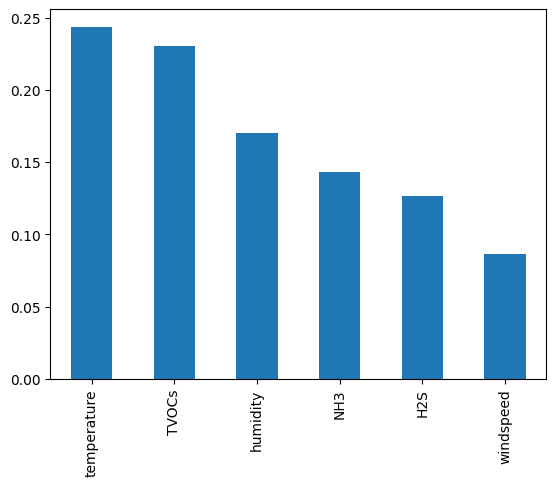

In [ ]:
importance.nlargest(6).plot(kind = 'bar')

# Implementing LSTM

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
file_path9 = '/content/2022-12-01-2023-07-01(109지점).xls.xlsx'
df9 = pd.read_excel(file_path9)
df9 = pd.read_excel(file_path9, parse_dates= ['시간'])
df9.drop(df9.iloc[-1].name, axis=0, inplace=True)
df9['시간'] = pd.to_datetime(df9['시간'])

In [ ]:
#Getting rid of Outliers
df9.drop(df9[df9["ou"]>15].index, inplace=True)
df9.drop(df9[df9["TVOCs"]>0.11].index, inplace=True)
df9.drop(df9[df9["NH3"]<0.3].index, inplace=True)

In [ ]:
lower_quantile = df9['ou'].quantile(0.01)  # 1th percentile
upper_quantile = df9['ou'].quantile(0.99)  # 99th percentile

df9['ou'] = df9['ou'].clip(lower=lower_quantile, upper=upper_quantile)

In [ ]:
len(df9)

55615

In [ ]:
#dfw = df9.drop(['ou', '시간', 'winddirection', 'pozip', 'atm'], axis=1)
#train = dfw.iloc[:55215]
#test = df9['ou'].iloc[55215:]


In [ ]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler.fit(train)
#scaled_train = pd.DataFrame(MinMaxScaler().fit(train).transform(train))
#scaled_train = scaler.transform(x.values.reshape(-1, 1))
#scaled_text = scaler.transform(y.values.reshape(-1, 1))

In [ ]:
# Preprocess data
# Scale the data to the range [0, 1] using Min-Max scaling
#scaler = MinMaxScaler(feature_range=(0, 1))

#x = pd.DataFrame(MinMaxScaler().fit(x).transform(x))

scaled_data = scaler.fit_transform(df9['ou'].iloc[55215:].values.reshape(-1, 1))

In [ ]:
# Load time series data
# Assuming your data is stored in a pandas DataFrame with a column named 'value'
# Adjust this based on your dataset
# For example, if you have a CSV file, you can use pd.read_csv('your_file.csv')
# Make sure your 'value' column represents the target variable you want to predict

# Create training data and labels
# In this example, let's predict the next value based on a certain number of past observations (look_back)
def create_dataset(dataset, look_back=1):
    dfX, dfY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dfX.append(a)
        dfY.append(dataset[i + look_back, 0])
    return np.array(dfX), np.array(dfY)

# Set the number of past observations to consider
look_back = 3

# Create the LSTM dataset
X, y = create_dataset(scaled_data, look_back)

# Reshape the input data to be in the format [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
trainX, testX = X[0:train_size, :], X[train_size:len(X), :]
trainY, testY = y[0:train_size], y[train_size:len(y)]

#model = model.to('cuda')


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

Epoch 1/25
265/265 - 2s - loss: 0.0231 - 2s/epoch - 9ms/step
Epoch 2/25
265/265 - 1s - loss: 0.0089 - 756ms/epoch - 3ms/step
Epoch 3/25
265/265 - 1s - loss: 0.0077 - 733ms/epoch - 3ms/step
Epoch 4/25
265/265 - 1s - loss: 0.0074 - 731ms/epoch - 3ms/step
Epoch 5/25
265/265 - 1s - loss: 0.0075 - 755ms/epoch - 3ms/step
Epoch 6/25
265/265 - 1s - loss: 0.0075 - 755ms/epoch - 3ms/step
Epoch 7/25
265/265 - 1s - loss: 0.0072 - 751ms/epoch - 3ms/step
Epoch 8/25
265/265 - 1s - loss: 0.0070 - 772ms/epoch - 3ms/step
Epoch 9/25
265/265 - 1s - loss: 0.0072 - 767ms/epoch - 3ms/step
Epoch 10/25
265/265 - 1s - loss: 0.0070 - 987ms/epoch - 4ms/step
Epoch 11/25
265/265 - 1s - loss: 0.0072 - 1s/epoch - 4ms/step
Epoch 12/25
265/265 - 1s - loss: 0.0070 - 1s/epoch - 4ms/step
Epoch 13/25
265/265 - 1s - loss: 0.0071 - 952ms/epoch - 4ms/step
Epoch 14/25
265/265 - 1s - loss: 0.0071 - 745ms/epoch - 3ms/step
Epoch 15/25
265/265 - 1s - loss: 0.0073 - 767ms/epoch - 3ms/step
Epoch 16/25
265/265 - 1s - loss: 0.0071 - 7

In [ ]:
# Make predictions on the test data
testPredict = model.predict(testX)

5/5 [==============================] - 0s 3ms/step


In [ ]:
# Invert the scaling for the predictions and actual values
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1, 1))

In [ ]:
testY_short = testY[:400]
testPredict_short = testPredict[:400]

Root Mean Squared Error (RMSE): 0.24729930896475955


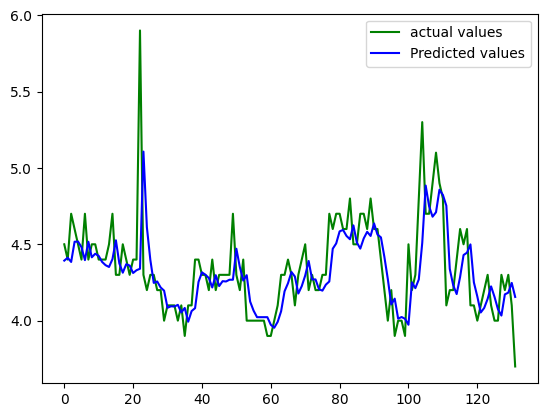

In [ ]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(testY, testPredict))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.plot([i for i in range(len(testY_short))],testY_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(testY_short))],testPredict_short, color='blue', label="Predicted values")
#plt.plot(testY, label='Actual')
#plt.plot(testPredict, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import  r2_score
# Evaluating model performance
print('R-square is :', r2_score(testY, testPredict))

R-square is : 0.3299596531024399


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(testY, testPredict)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.061156948214447594


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'LSTM.pkl')

In [ ]:
#TO LOAD THE MODEL
model = joblib.load('LSTM.pkl')

# SVM

In [ ]:
#Threshold

df9.drop(df9[df9["ou"]>15].index, inplace=True)
df9.drop(df9[df9["TVOCs"]>0.11].index, inplace=True)
df9.drop(df9[df9["NH3"]<0.3].index, inplace=True)

In [ ]:
# prompt: implement svm classifier on dataset

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df8[['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed']], df8['ou'], test_size=0.25)
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert the target variable to a binary variable
y_train = np.where(y_train > 0, 1, 0)
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

ValueError: ignored